In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import classification_report, average_precision_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
original_df = pd.read_csv('creditcard.csv')
df = original_df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [86]:
# No Null values so we don't have to find ways to replace them
df.isnull().sum().max()

0

In [87]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


/Users/tim/Dev/credit_card_fraud_detection/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tim/Dev/credit_card_fraud_detection/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of Time Column')

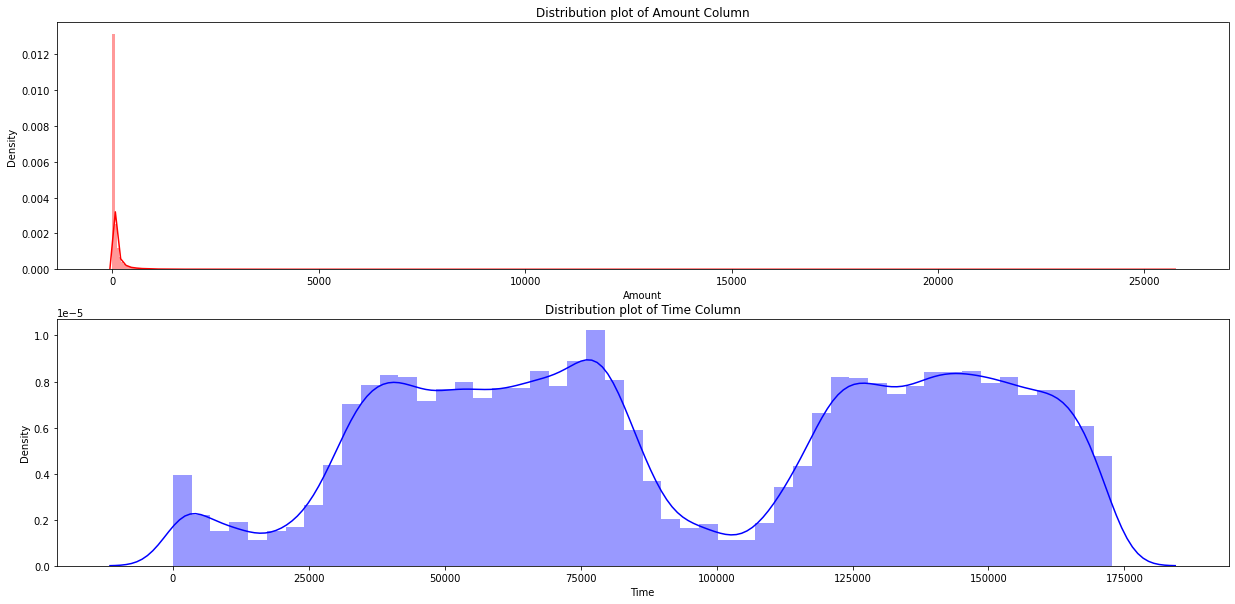

In [88]:
# look at distribution for Time and Amount
fig, ax = plt.subplots(2, 1, figsize=(21,10))
sns.distplot(df.Amount, bins=500, color='r', ax=ax[0])
ax[0].set_title("Distribution plot of Amount Column")
sns.distplot(df.Time, bins=50, color='b', ax=ax[1])
ax[1].set_title("Distribution plot of Time Column")

In [89]:
max(df.Time)
# check time in hours
max(df.Time)/60/60

47.99777777777778

In [90]:
# Also no missing values, there could have been a correlation between missing values and fraudulent transactions
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [91]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/Users/tim/Dev/credit_card_fraud_detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

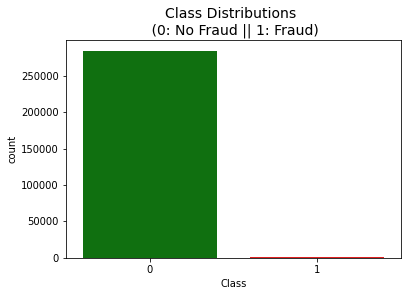

In [92]:
# visualise this
colors = ["Green", "Red"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [93]:
ratio_cases = df['Class'].value_counts()/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


This is an incredibly imbalanced dataset. The vast majority of transactions are non-fraud.
If we use this dataframe we may get a lof of errors as the algorithms are very likely to overfit since it
will assume that most transactions are non-fraud.

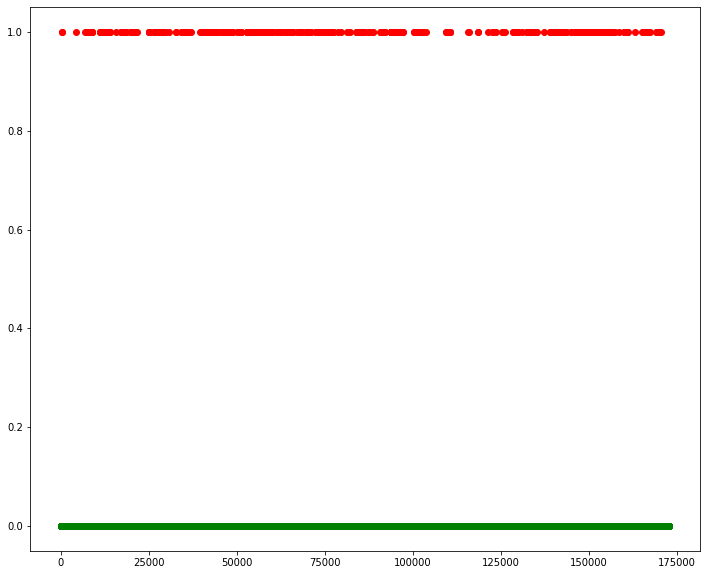

In [94]:
# explore whether transactions occur at specific times
plt.figure(figsize=(12,10))
plt.scatter(df.Time[df.Class==1], df.Class[df.Class==1], c="red")
plt.scatter(df.Time[df.Class==0], df.Class[df.Class==0], c="green")

There does not appear to be a pattern here

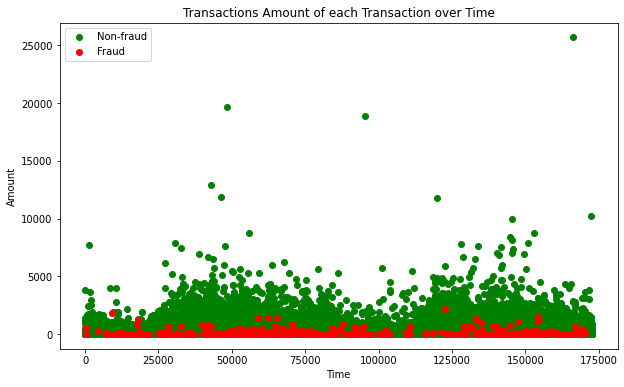

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(df.Time[df.Class==0], df.Amount[df.Class==0], label="Non-fraud", color=["green"])
plt.scatter(df.Time[df.Class==1], df.Amount[df.Class==1], label="Fraud", color=["red"])

plt.title("Transactions Amount of each Transaction over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()

We can see that the transaction amount for each fraudulent transaction is significantly lower than for the Real transactions

In [96]:
df.Amount.skew()

16.977724453761024

/Users/tim/Dev/credit_card_fraud_detection/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Transaction Amounts')

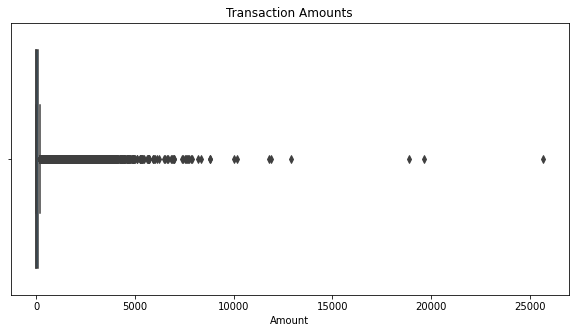

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Amount"])
plt.title("Transaction Amounts")

Text(0.5, 1.0, 'V1-V28 Means')

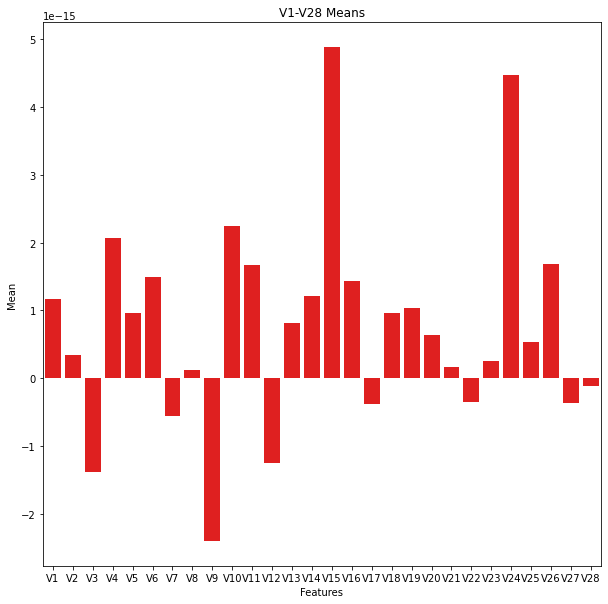

In [98]:
# let's visualise the mean and sd of the features
vs = df.drop(labels=["Time", "Amount", "Class"], axis=1)

plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.mean(), color="red")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.title("V1-V28 Means")

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

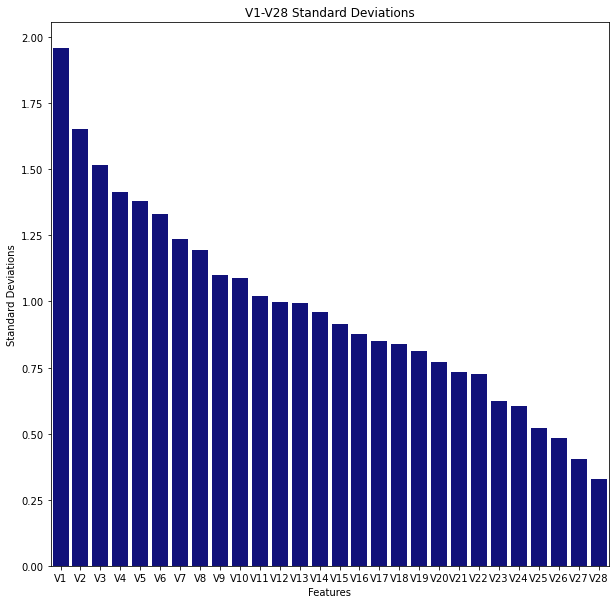

In [99]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.std(), color="darkblue")
plt.xlabel("Features")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations")

Text(0.5, 1.0, 'V1-V28 Skewness')

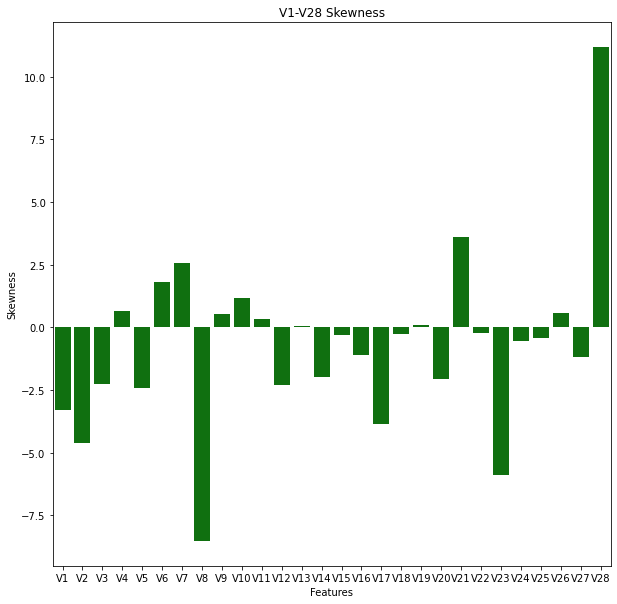

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="green")
plt.xlabel("Features")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness")

In [101]:
# Robust Scaler is less prone to outliers
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [102]:
# convert the dataframe into two variables
X=df.drop("Class", axis=1)
y=df.Class

In [103]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [104]:
y_train.value_counts(), y_test.value_counts()

(0    227451
 1       394
 Name: Class, dtype: int64,
 0    56864
 1       98
 Name: Class, dtype: int64)

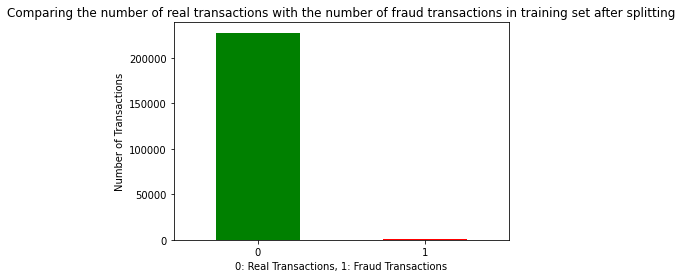

In [105]:
# let's compare the ratio of fraud to non-fraud transactions after splitting
y_train.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("Comparing the number of real transactions with the number of fraud transactions in training set after splitting")
plt.xticks(rotation=0);

In [106]:
ratio_cases = y_train.value_counts()/len(y_train)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001729245759178389
Ratio of non-fraudulent cases: 0.9982707542408216


In [107]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.167819,0.689153
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0.333962,0.381595
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.139873,0.762145
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,1.333613,0.105476
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0.052540,-0.023931


We will now look into sampling our data. Undersampling is a possibility but we are going to look into over sampling
and SMOTE sampling

In [108]:
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [109]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_ros.shape, y_train_ros.shape

((454902, 30), (454902,))

In [110]:
y_train_ros.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [111]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((454902, 30), (454902,))

In [112]:
y_train_ros.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [113]:
# we are going to make a function for testing models and sampling
models={"Logistic Regression": LogisticRegression(max_iter=200),
        "SGDClassifier": SGDClassifier(),
        "RFC": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates a number of given ML models
    :param models: dictionary of different models
    :param X_train: training data
    :param X_test: test data
    :param y_train: training data target values
    :param y_test: test data predictions
    :return:
    """
    # set random seed
    np.random.seed(42)

    # make dict to keep scores
    model_scores = {}

    # loop through models and fit to data
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [114]:
model_scores = fit_and_score(models, X_train_smote, X_test, y_train_smote, y_test)
model_scores

{'Logistic Regression': 0.9751939889751062,
 'SGDClassifier': 0.9724377655278957,
 'RFC': 0.9995435553526912,
 'Decision Tree': 0.9977528878901724}

In [115]:
model_scores = fit_and_score(models, X_train_ros, X_test, y_train_ros, y_test)
model_scores

{'Logistic Regression': 0.9761771005231558,
 'SGDClassifier': 0.9807942136863171,
 'RFC': 0.9996137776061234,
 'Decision Tree': 0.9991748885221726}